In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas

In [2]:
import sys
sys.path.append('/home/leandro/OrgaDeDatos/Fiuba-Big-Data-Analytics-TPs/Tp1/')
from BySanti import filter

In [3]:
train = pd.read_csv('/home/leandro/OrgaDeDatos/Fiuba-Big-Data-Analytics-TPs/Tp1/Datos/Entrenamieto_ECI_2020.csv')
filter.full_correction(train)

In [4]:
train.head(20)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2017,NaT,7,USD,2659494.6,USD,2659494.6,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,50688.0,USD,50688.0,Closed Won,Prod_Category_A_None
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,15600.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,4400.0,JPY,470400.0,Closed Lost,Prod_Category_A_None


# Algunas de las Region Japan tienen Territory None, asi que reemplazo ese None por Japan

In [5]:
train.loc[(train.Territory =='None' )&(train.Region=='Japan'),'Territory'] = 'Japan'

In [6]:
train.head(20)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2017,NaT,7,USD,2659494.6,USD,2659494.6,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,50688.0,USD,50688.0,Closed Won,Prod_Category_A_None
8,24353,Japan,Japan,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,15600.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
9,24355,Japan,Japan,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,4400.0,JPY,470400.0,Closed Lost,Prod_Category_A_None


# Top Territorios con mas oportunidades

# Grafico con mapa


In [7]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = pd.DataFrame(world[world.name != 'Antarctica']).sort_values(by=['name'])
world.name.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.',
       'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Is

In [8]:
world[world.name == 'United States of America']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


# # Reviso que los nombres de los paises esten iguales para que al graficar detecte todos los paises usando el GeoPandas

In [9]:
train.loc[(train.Territory =='NW America' ),'Territory'] = 'United States of America'
train.loc[(train.Territory =='NE America' ),'Territory'] = 'United States of America'
train.loc[(train.Territory =='SE America' ),'Territory'] = 'United States of America'
train.loc[(train.Territory =='SW America' ),'Territory'] = 'United States of America'
train.loc[(train.Territory =='SE America' ),'Territory'] = 'United States of America'
train.loc[(train.Territory =='Central US' ),'Territory'] = 'United States of America'
train.loc[(train.Territory =='China (PRC)'),'Territory'] = 'China'
train.loc[(train.Territory =='UAE (Dubai)'),'Territory'] = 'United Arab Emirates'
train.loc[(train.Territory =='UAE (Others)'),'Territory'] = 'United Arab Emirates'
train.loc[(train.Territory =='Bosnia & Herzegovina'),'Territory'] = 'Bosnia and Herz.'
train.loc[(train.Territory =='Solomon Islands'),'Territory'] = 'Solomon Is.'
train.loc[(train.Territory =='Czech Republic'),'Territory'] = 'Czechia'
train.loc[(train.Territory =='KSA'),'Territory'] = 'Saudi Arabia'


Detecto que hay algunos territorios que no se encuentran dentro del GeoDataFrame World

In [10]:
Territorios = train.groupby('Territory').count().reset_index()[['Territory']].copy()
Territorios['esta'] = Territorios['Territory'].isin(world['name'])
Territorios[Territorios.esta == False]

,Territory,esta
8,Burma,False
11,Carribean,False
12,Central America,False
38,Malta,False
39,Monaco,False
43,None,False
52,Singapore,False
55,South America,False
56,South East Asia,False


In [11]:
topPaises =  train[['Territory','ID']].groupby('Territory').count().rename(columns = {'ID' : 'Total_Oportudidades'})\
            .sort_values(by=['Total_Oportudidades'],ascending=False)
topPaises = topPaises.reset_index()
topPaises

,Territory,Total_Oportudidades
0,Japan,4892
1,United States of America,3281
2,Germany,1682
3,Australia,1208
4,India,809
...,...,...
65,Czechia,1
66,Monaco,1
67,Egypt,1
68,Georgia,1


Genero el mapa finalmente

In [12]:
topPaisesMAP = pd.merge(topPaises,world,left_on="Territory",right_on="name",how='right')

topPaisesMAP=geopandas.GeoDataFrame(topPaisesMAP)

topPaisesMAP['Total_Oportudidades'].fillna(0, inplace=True)

topPaisesMAP[topPaisesMAP.Territory == 'United States of America']

,Territory,Total_Oportudidades,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,United States of America,3281.0,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


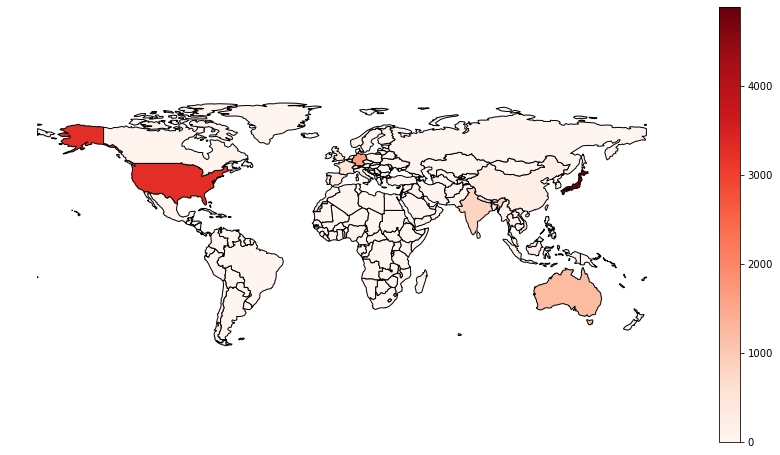

In [93]:
fig, ax = plt.subplots(1,figsize=(15, 8))
topPaisesMAP.plot(column="Total_Oportudidades",cmap="Reds",ax=ax,edgecolor='black', linewidth=1)
ax.axis('off')
vmin = topPaisesMAP['Total_Oportudidades'].min()
vmax = topPaisesMAP['Total_Oportudidades'].max()
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# Bar Plot

Text(0.5, 1.0, 'Top 5 territorios con más opotunidades')

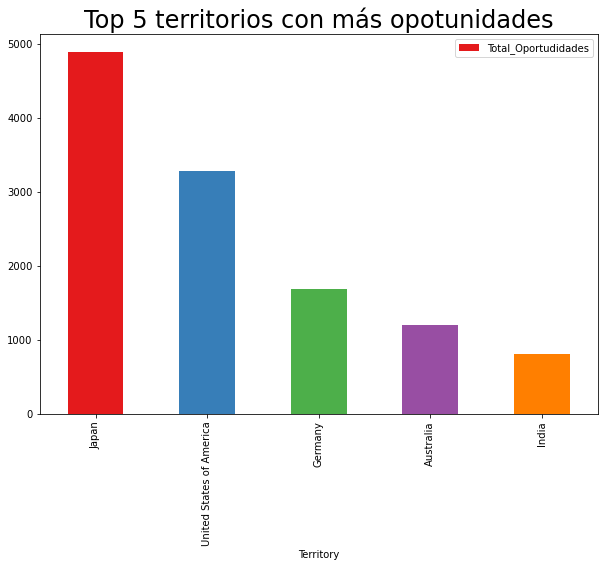

In [14]:
colores = plt.cm.Set1(range(5))
topPaises.head(5).plot(x= 'Territory', y='Total_Oportudidades' ,kind = 'bar',figsize= (10,7), color = colores)
plt.title('Top 5 territorios con más opotunidades',fontsize=24)


# Opotunidades ganadas y perdidas por año

In [15]:
años = train[['ID','Delivery_Year', 'Stage']].groupby(['Delivery_Year', 'Stage']).count().unstack().fillna(0)
años.columns = ['Closed_Lost','Closed_Won','Negotiation','Proposal','Qualification']
años = años.reset_index()
años

,Delivery_Year,Closed_Lost,Closed_Won,Negotiation,Proposal,Qualification
0,2016,2234.0,2137.0,0.0,0.0,0.0
1,2017,2222.0,4095.0,0.0,1.0,0.0
2,2018,2634.0,3196.0,0.0,0.0,0.0
3,2019,260.0,105.0,18.0,23.0,8.0
4,2020,0.0,0.0,0.0,11.0,3.0


Text(0.5, 1.0, 'Closes Won vs Closes Lost en años')

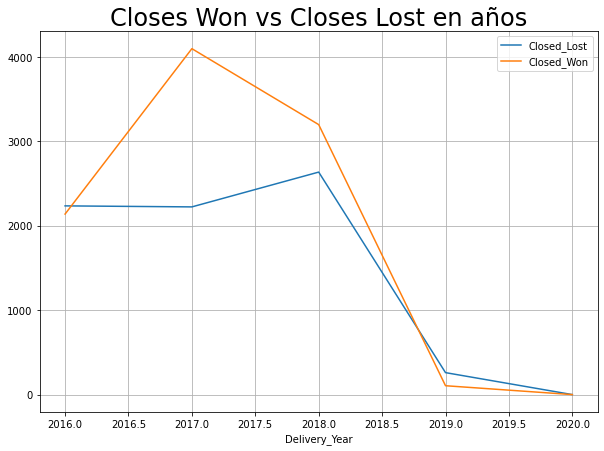

In [16]:
años[['Delivery_Year', 'Closed_Lost','Closed_Won']].plot(x = 'Delivery_Year', kind= 'line', figsize= (10,7))
plt.grid()
plt.title('Closes Won vs Closes Lost en años',fontsize=24)

# Entre el 2018 y el 2019 se redujeron considerablemente los Closed_Won
# Voy a analizar este descenso

In [45]:
#Primero voy a veo si ocurrio algo con las opotunidades en de los paises entre estos años


oportunidades2018 = train[train.Delivery_Year == 2018]
oportunidades2018 =  oportunidades2018[['Territory','ID']].groupby('Territory').count().rename(columns = {'ID' : 'Total_Oportudidades'})\
            .sort_values(by=['Total_Oportudidades'],ascending=False)
oportunidades2018 = oportunidades2018.reset_index()


oportunidades2019 = train[train.Delivery_Year == 2019]
oportunidades2019 =  oportunidades2019[['Territory','ID']].groupby('Territory').count().rename(columns = {'ID' : 'Total_Oportudidades'})\
            .sort_values(by=['Total_Oportudidades'],ascending=False)
oportunidades2019 = oportunidades2019.reset_index()




oportunidades2018VS2019 = pd.merge(oportunidades2018,oportunidades2019,left_on="Territory",right_on="Territory", how = 'outer').fillna(0)
oportunidades2018VS2019.columns = ['Territory','Total_Oportudidades_2018','Total_Oportudidades_2019']
oportunidades2018VS2019['Perdida_2018_A_2019']= ((oportunidades2018VS2019['Total_Oportudidades_2018'] - oportunidades2018VS2019['Total_Oportudidades_2019']))
oportunidades2018VS2019

,Territory,Total_Oportudidades_2018,Total_Oportudidades_2019,Perdida_2018_A_2019
0,United States of America,1360.0,96.0,1264.0
1,Japan,860.0,83.0,777.0
2,Germany,765.0,48.0,717.0
3,Australia,563.0,73.0,490.0
4,India,293.0,13.0,280.0
5,None,289.0,20.0,269.0
6,Netherlands,286.0,16.0,270.0
7,Singapore,186.0,2.0,184.0
8,France,168.0,6.0,162.0
9,Belgium,142.0,1.0,141.0


In [49]:
#Voy a ver que paso con los top5 paises a los que mas oportunidades habia en 2018 y que paso en 2019 

años2018_2019 = train[(train.Delivery_Year == 2018) | (train.Delivery_Year == 2019)]
top5 = ['United States of America', 'Japan','Germany', 'Australia', 'India']
años2018_2019top5 = años2018_2019.loc[años2018_2019['Territory'].isin(top5)]

años2018_2019top5

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Month,Delivery_Quarter,Delivery_Year,Total_Power,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
3,16808,Americas,United States of America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,14,USD,7421881.50,USD,7421881.50,Closed Lost,Prod_Category_A_None
4,16805,Americas,United States of America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,25,USD,13357192.50,USD,13357192.50,Closed Lost,Prod_Category_A_None
5,16802,Americas,United States of America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,28,USD,14838277.50,USD,14838277.50,Closed Lost,Prod_Category_A_None
84,28771,EMEA,Germany,1,0,1,0,0,5,2015-12-04,...,"(4, 2018)",Q2,2018,17,EUR,5618160.00,EUR,5618160.00,Closed Lost,Prod_Category_A_None
604,13333,Americas,United States of America,1,0,1,0,0,5,2016-10-04,...,"(2, 2018)",Q1,2018,1,USD,379746.00,USD,3618756.00,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16100,20803,Americas,United States of America,1,1,1,1,0,4,2013-07-27,...,"(12, 2018)",Q4,2018,1,USD,309441.60,USD,309441.60,Closed Won,Prod_Category_A_None
16101,5839,Americas,United States of America,0,0,0,0,0,4,2016-06-15,...,"(1, 2019)",Q1,2019,0,USD,1198.53,USD,22157.43,Closed Won,Prod_Category_A_None
16102,5845,Americas,United States of America,0,0,0,0,0,4,2016-06-15,...,"(1, 2019)",Q1,2019,0,USD,5752.50,USD,22157.43,Closed Won,Prod_Category_A_None
16103,5850,Americas,United States of America,0,0,0,0,0,4,2016-06-15,...,"(1, 2019)",Q1,2019,0,USD,15206.40,USD,22157.43,Closed Won,Prod_Category_A_None


In [57]:
#analizo a Delivery_Quarter
años2018_2019_Delivery_Quarter = años2018_2019top5[['Territory', 'Delivery_Quarter','Delivery_Year', 'ID']].groupby(['Delivery_Quarter','Delivery_Year', 'Territory']).count().unstack().unstack().fillna(0).reset_index()
años2018_2019_Delivery_Quarter.columns = años2018_2019_Delivery_Quarter.columns.droplevel()
años2018_2019_Delivery_Quarter

Territory         Australia       Germany       India        Japan        \
Delivery_Year          2018  2019    2018  2019  2018  2019   2018  2019   
0              Q1     165.0  51.0   128.0  46.0  81.0  10.0  205.0  46.0   
1              Q2     184.0  13.0   160.0   2.0  78.0   3.0  364.0  17.0   
2              Q3     121.0   6.0   201.0   0.0  63.0   0.0  137.0   8.0   
3              Q4      93.0   3.0   276.0   0.0  71.0   0.0  154.0  12.0   

Territory     United States of America        
Delivery_Year                     2018  2019  
0                                350.0  50.0  
1                                328.0  30.0  
2                                336.0  16.0  
3                                346.0   0.0

In [70]:
años2018_2019_Opportunity_Owner = años2018_2019[['Opportunity_Owner','Delivery_Year', 'ID']].groupby(['Opportunity_Owner','Delivery_Year']).count().unstack().fillna(0).reset_index()
#años2018_2019_Opportunity_Owner.columns = años2018_2019_Opportunity_Owner.columns.droplevel()
años2018_2019_Opportunity_Owner.columns = ['Opportunity_Owner', 2018, 2019]
años2018_2019_Opportunity_Owner

,Opportunity_Owner,2018,2019
0,0,1.0,0.0
1,2,111.0,6.0
2,3,243.0,9.0
3,4,293.0,9.0
4,5,73.0,16.0
5,8,488.0,36.0
6,11,9.0,0.0
7,13,442.0,34.0
8,14,66.0,5.0
9,16,166.0,6.0
